# Assignment 1 - Team E
Dominic Dill, Saideep Arikontham, Guoyi Zhan, Keke Zhang

## Step 1 Data Preprocessing: 
### A.	Begin by preprocessing the physician's notes. This should include:

* i.	Case Conversion
* ii.	Removing Punctuation and Special Characters
* iii.	Correcting Typos and Spelling. Think of quicker faster ways of doing this.
* iv.	Standardizing Formats for dates, numbers, and currencies etc.
* v.	Handling Contractions: Expanding contractions like "can't" to "cannot".
* vi.	 You may also consider optional steps like stemming and lemmatization. 
* vii.	Apply a stop word list to filter out unnecessary words.

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from textblob import TextBlob
import contractions

In [2]:
# Ensure necessary NLTK resources are downloaded
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('book')

In [3]:
# Read the data
file_path = "./patient_notes.csv"
notes = pd.read_csv(file_path)
notes.shape

(42146, 3)

In [4]:
testing = False
frac = 0.3 #percent of data to use for testing
if testing:
    notes = notes.sample(frac=frac, random_state=42)
notes.shape

(42146, 3)

In [5]:
contractions.add('yo', 'year old')
contractions.add('y.o.', 'year old')
contractions.add('y.o', 'year old')
contractions.add('y/o', 'year old') 
contractions.add('yr,', 'year')
contractions.add('m', 'male')
contractions.add('f','female')

### Add medical contractions

In [6]:
#taken from here, slightly edited: https://www.dukemychart.org/home/en-us/docs/commonmedicalabbreviations.pdf

test = '''A/P: Assessment and Plan
BMI: Body Mass Index
BMP: Basic Metabolic Profile 
BP: Blood Pressure
C&S: Culture and Sensitivity
C/O: complains of
CBC: Complete Blood Count
CC: Chief Complaint
CCE: clubbing, cyanosis or edema
Chemistry: a blood test looking at levels of electrolytes and kidney or liver function
Chem Panel: a blood test looking at levels of electrolytes and kidney or liver function
CKD: Chronic Kidney Disease
CMP: a blood test looking at levels of electrolytes, kidney and liver function
D/Dx: Differential Diagnosis
DOE: Dyspnea on exertion
DM: Diabetes Mellitus
DMII: Diabetes Mellitus Type II
ECG/EKG: Electrocardiogram
EOMI: Extra-ocular eye movements intact
ESRD: End Stage Renal Disease
ETOH: Alcohol
ETT: Endotracheal tube 
EXT: Extremities
F/U: Follow-up
GI: Gastrointestinal
GU: Genito-urinary (referring to the Urinary Tract)
H&H: Hemoglobin and Hematocrit
H&P: History and Physical
HCT: Hematocrit
HGB: Hemoglobin
HgBA1C: A blood test that measures your average blood glucose control over the last 3 months
HPI: History of the Present Illness
HEENT: Head, Ears, Eyes, Nose and Throat
HTN: Hypertension (High Blood Pressure)
I&D: Incision and Drainage
IM: intra-muscular
IMP: Impression
IV: Intra-venous
LBP: low back pain
LMP: last menstrual period
ND: naso-duodenal 
Neuro: Neurologic 
NG: naso-gastric
NJ: naso-jejunal
N/V: nausea and vomiting
OT: Occupational Therapy 
P: pulse
PCP: Primary Care Provider
PERRLA: Pupils equal, round and reactive to light and accommodation
PLT: Platelets
PMHx:Past Medical History
PO: to be taken by mouth
PR: to be taken by rectum
PRN: As needed
PSHx: Past Surgical History
Pt: patient
Renal Function Panel: a blood test looking at levels of electrolytes and kidney function
R/O: Rule Out
RR: Respiratory Rate
SocHx or SH:Social History
SOB: Shortness of breath
SQ: Sub-cutaneous
ST: Speech Therapy
STI: Sexually transmitted infection
T: Temperature
TM: Tympanic membrane
UA: Urinalysis
URI: Upper Respiratory Infection
UTI: Urinary Tract Infection
VSS: Vital Signs Stable
WBC: White blood cell 
WCC: Well Child Check
WT: Weight'''

for x in test.split('\n'):
    contractions.add(x.split(':')[0], x.split(':')[1])

## Create preprocessing function

In [7]:
# Text preprocessing function
def preprocess_text(text):
    # Convert to lower case
    text = text.lower()
    
    # add space inbetween numbers and letters (e.g. 5mg to 5 mg, 17yo to 17 yo)
    text = re.sub(r'(\d+)([a-zA-Z])', r'\1 \2', text)
    
    # Expand contractions (e.g., "can't" to "can not")
    text = contractions.fix(text)
    
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', ' ', text)

    # Apply stopwords list
    stop_words = set(stopwords.words('english'))
    
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    
    return text

## preprocess all of the physicians notes

In [8]:

# Apply the preprocessing to the 'pn_history' column
notes['processed_pn_history'] = notes['pn_history'].apply(preprocess_text)
notes.sample(n=20, random_state=42)

# Optional: Spelling correction
# This can be very time-consuming, especially for large datasets
# Uncomment the line below if you wish to apply spelling correction
# notes['pn_history'] = notes['pn_history'].apply(lambda x: str(TextBlob(x).correct()))


,pn_num,case_num,pn_history,processed_pn_history
7781,32796,3,35yo M c/o stomach problems since 2months star...,35 year old male complains stomach problem sin...
27739,60705,6,Patient is a 17yo male presenting with chest p...,patient 17 year old male presenting chest pain...
33249,80467,8,cc: 67-year-old female c/o trouble sleeping. \...,chief complaint 67 year old female complains t...
17607,42923,4,HPI: 45 YO F C/O NERVOUSNESS THAT STARTED A FE...,history present illness 45 year old female com...
1900,2055,0,Mr. Cleveland is a 17 yo male who presents due...,mr cleveland 17 year old male present due 2 3 ...
27298,60211,6,CC: chest pain\r\nHPI: 17 yo m c/o with pmh o...,chief complaint chest pain history present ill...
37863,90899,9,Ms. Mullen is a 20 year old female presenting ...,m mullen 20 year old female presenting headach...
23336,53233,5,"26 YO F C/O PALPIATION , STARTED 3 MOS AGO WIT...",26 year old female complains palpiation starte...
10904,35993,3,Pt is a 35 yo M with epigastric pain for the p...,patient 35 year old male epigastric pain past ...
20023,45414,4,Pt is a 45 yo F with no PMHx presenting with s...,patient 45 year old female past medical histor...


In [9]:
notes.shape

(42146, 4)

## Step 2: Document-Term Matrix (DTM) Creation: 
* a.	Create a Document-Term Matrix with appropriate weighting, choice of n-grams, and other hyperparameters. This matrix will form the basis for your subsequent analyses.
* b.	Describe the DTM from the dataframe (df) perspective, such as size, memory etc. 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer 

# Initialize the vectorizer with n-grams and other hyperparameters as needed
# Since the preprocessing is already done, we don't need to specify a custom tokenizer or stop words
# TF-IDF vectorizer utilizes l2 normalization by default
vectorizer = TfidfVectorizer()

# Fit and transform th e preprocessed 'pn_history' column to create the DTM
dtm = vectorizer.fit_transform(notes['processed_pn_history'])
dtm_dense = dtm.todense()

# Convert DTM to a DataFrame
dtm_df = pd.DataFrame(dtm_dense, columns=vectorizer.get_feature_names_out())
dtm_df.head(20)

,00,000,0000,01,02,0202,03,0300,04,0400,...,zero,zexually,zig,ziminopril,zno,zo,zolpidem,zone,zyban,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
dtm_df.info()
# Describe the DTM
# print("Size of the DTM: ", dtm_df.shape) 
# memory_usage = dtm_df.memory_usage(deep=True).sum()
# print("Memory usage (in bytes): ", memory_usage)
# #notes, notes['pn_history_preprocessed'], dtm
# #feature_names = vectorizer.get_feature_names_out()
# #print("Number of features: ",feature_names[0:10])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42146 entries, 0 to 42145
Columns: 41769 entries, 00 to zzz
dtypes: float64(41769)
memory usage: 13.1 GB


### TfidfVectorizer has a few parameters that we could use to constrain the dimensionality of the matrix we generate 
- max_df could be used to ignore frequent terms
- min_df could be used to ignore infrequent terms
- max_features could be used to put a cap on dimensions, keeping only the features with the n highest tf
- stop_words excludes certain words from being added as dimensions, regardless of their frequency
- ngram_range greater than (1,1) allows for combinations of more than 1 words as a feature

Depending on how we set these parameters, they can be thought of as a potential type of dimensionality reduction

## 3. Machine Learning Implementation:
### A. ML Pipeline: This should include normalization of your data to ensure uniformity and outlier analysis to identify and address any anomalies in your dataset.

TF-IDF vectorization employs l2 normalization by default. We also use a truncated SVD approach with normalization post TF-IDF vectorization. KMeans clustering should be used on normalized data. In both scenarios this is the case 
### B. Dimension Reduction: Apply dimension reduction techniques. The aim here is to reduce the complexity of your data while retaining its essential characteristics. This step is crucial for effective clustering.

We employ dimension reduction with LSA, choosing an arbitrary number of dimensions to retain, but hope to keep close to 80% of the original variance
### C. Clustering: With your data preprocessed and dimensionally reduced, apply clustering techniques. Choose appropriate clustering algorithms to identify patterns and groupings in your datase

KMeans was the only clustering technique used

In [12]:
min_cluster = 6
max_cluster = 13

## Apply KMeans clustering directly on the TF-IDF matrix

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt


inertia_values = []
silhouette_scores = []

for num_clust in range(min_cluster,max_cluster+1):
    kmeans = KMeans(n_clusters=num_clust, random_state=42, n_init='auto').fit(dtm)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number elements in {num_clust} clusters: {cluster_sizes}")
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(dtm, kmeans.labels_))


Number elements in 6 clusters: [5404 6135 9177 4190 7481 9759]
Number elements in 7 clusters: [5401 6053 2861 4190 6737 7756 9148]
Number elements in 8 clusters: [5404  808 6903 6067 6755 2268 9750 4191]
Number elements in 9 clusters: [5409  808 6903 6067 1595 2270 9752 4192 5150]
Number elements in 10 clusters: [5407 6274 6903 6066 1595 2269 3482 4192  808 5150]
Number elements in 11 clusters: [5410 6274 6909 4097 1595 2268 3485 4192  808 5150 1958]
Number elements in 12 clusters: [5410 6274 2415 4097 1594 4499 3483 4191  808 5150 1958 2267]
Number elements in 13 clusters: [5409 5094 2415 4096  808 4499 1596 4191 3071 5150 1958 2266 1593]


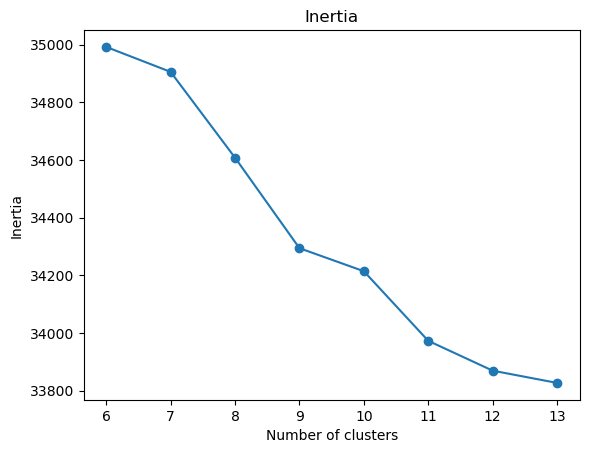

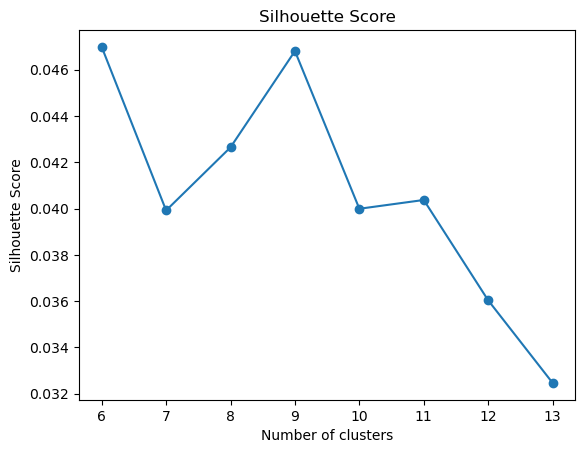

In [14]:
# Plot the inertia values
plt.plot(range(min_cluster,max_cluster+1), inertia_values, marker='o') 
plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')  
plt.show()

# Plot the silhouette scores
plt.plot(range(min_cluster,max_cluster+1), silhouette_scores, marker='o') 
plt.title('Silhouette Score') 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score')
plt.show()



## LSA
Apply LSA 
https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html#sphx-glr-auto-examples-text-plot-document-classification-20newsgroups-py


In [15]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

lsa = make_pipeline(TruncatedSVD(n_components=1000), Normalizer(copy=False))

In [16]:
X_lsa = lsa.fit_transform(dtm)
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

Explained variance of the SVD step: 68.0%


In [17]:
inertia_values = []
silhouette_scores = []

for num_clust in range(min_cluster,max_cluster+1):
    kmeans = KMeans(n_clusters=num_clust, random_state=42, n_init='auto').fit(X_lsa)
    cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)
    print(f"Number of elements assigned to each cluster: {cluster_sizes}")
    
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_lsa, kmeans.labels_))

    original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

    for i in range(num_clust):
        print(f"\tCluster {i}: ", end="")
        for ind in order_centroids[i, :10]:
            print(f"{terms[ind]} ", end="")
        print()


Number of elements assigned to each cluster: [5403 9177 9764 6131 4192 7479]
	Cluster 0: nervousness 45 lecture english change professor week husband denies none 
	Cluster 1: episode palpitation none ago heart week 26 last patient denies 
	Cluster 2: pain tum stool back motrin epigastric uncle ulcer 35 construction 
	Cluster 3: period month last day irregular heavy year every cancer ago 
	Cluster 4: son hypertension pressure high 67 sleeping ambien asleep blood sleep 
	Cluster 5: pain headache yesterday ibuprofen tylenol migraine none dull 20 constant 
Number of elements assigned to each cluster: [5403 9180 5839 6155 4192 1597 9780]
	Cluster 0: nervousness 45 lecture english change professor week husband denies none 
	Cluster 1: episode palpitation none ago heart week 26 last patient denies 
	Cluster 2: headache yesterday pain ibuprofen migraine dull 20 none head bending 
	Cluster 3: period month last day irregular heavy year every cancer ago 
	Cluster 4: son hypertension pressure high

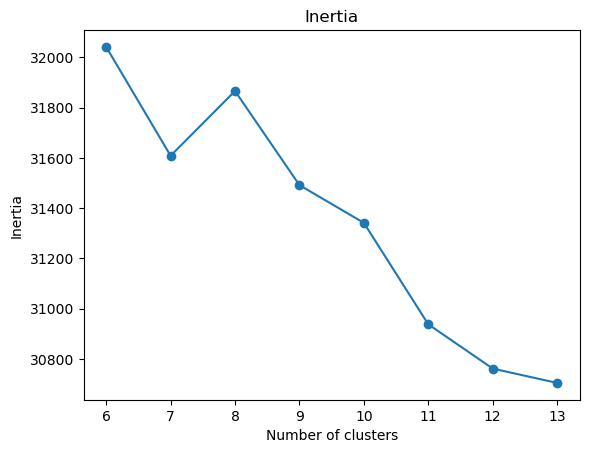

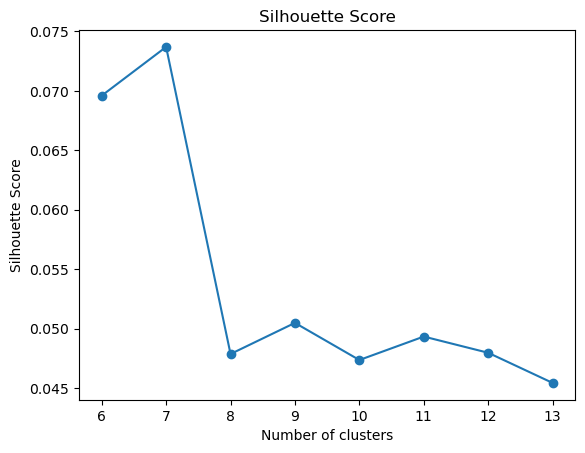

In [18]:
# Plot the inertia values
plt.plot(range(min_cluster,max_cluster+1), inertia_values, marker='o') 
plt.title('Inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')  
plt.show()

# Plot the silhouette scores
plt.plot(range(min_cluster,max_cluster+1), silhouette_scores, marker='o') 
plt.title('Silhouette Score') 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score')
plt.show()

### Messing around with outlier detection

In [19]:
from sklearn.ensemble import IsolationForest

In [20]:
clf = IsolationForest(random_state=42).fit(X_lsa)
test = clf.decision_function(X_lsa)
test_df = pd.DataFrame(test, columns=['anomaly_score'])
test_df.sort_values(by='anomaly_score', ascending=True).head(20)

,anomaly_score
19796,0.010240
32422,0.013611
2263,0.014794
19637,0.016231
17581,0.016505
30177,0.017019
19125,0.017717
5907,0.018099
5321,0.018115
11572,0.018514


### None are negative, so not much evidence for outliers

In [21]:
clf = IsolationForest(random_state=42).fit(dtm)
test = clf.decision_function(dtm)
test_df = pd.DataFrame(test, columns=['anomaly_score'])
test_df.sort_values(by='anomaly_score', ascending=True).head(20)

,anomaly_score
36879,0.150883
12082,0.154713
33226,0.155086
35869,0.155190
32473,0.155616
34767,0.155619
40863,0.157071
34859,0.157262
2790,0.157744
36871,0.157830
